In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate

Defaulting to user installation because normal site-packages is not writeable


In [5]:
# Dataset columns

columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'Class']

# Load your dataset
training_data = pd.read_csv('poker-hand-training-true.csv', header=None, names=columns)
testing_data = pd.read_csv('poker-hand-testing.csv', header=None, names=columns)

# Adjust the ranks of cards, specifically changing Ace from 1 to 14
def adjust_ranks(data):
    for i in range(1, 6):  # For each card in the hand
        data[f'C{i}'] = data[f'C{i}'].apply(lambda x: 14 if x == 1 else x)
    return data

# One-hot encode the suits of the cards
def one_hot_encode_suits(data):
    for i in range(1, 6):  # For each card in the hand
        data = pd.concat([data, pd.get_dummies(data[f'S{i}'], prefix=f'S{i}')], axis=1).drop([f'S{i}'], axis=1)
    return data

# Apply preprocessing steps
def preprocess_data(data):
    data = adjust_ranks(data)
    data = one_hot_encode_suits(data)
    return data

training_data_preprocessed = preprocess_data(training_data)
testing_data_preprocessed = preprocess_data(testing_data)

#Final Preprocessed DATA
print(training_data_preprocessed.head())
print(testing_data_preprocessed.head())

   C1  C2  C3  C4  C5  Class   S1_1   S1_2   S1_3   S1_4  ...   S3_3   S3_4  \
0  10  11  13  12  14      9   True  False  False  False  ...  False  False   
1  11  13  10  12  14      9  False   True  False  False  ...  False  False   
2  12  11  13  10  14      9  False  False   True  False  ...   True  False   
3  10  11  14  13  12      9  False  False  False   True  ...  False   True   
4  14  13  12  11  10      9  False  False  False   True  ...  False   True   

    S4_1   S4_2   S4_3   S4_4   S5_1   S5_2   S5_3   S5_4  
0   True  False  False  False   True  False  False  False  
1  False   True  False  False  False   True  False  False  
2  False  False   True  False  False  False   True  False  
3  False  False  False   True  False  False  False   True  
4  False  False  False   True  False  False  False   True  

[5 rows x 26 columns]
   C1  C2  C3  C4  C5  Class   S1_1   S1_2   S1_3   S1_4  ...   S3_3   S3_4  \
0  14  13   4   3  12      0   True  False  False  False  ...  

In [25]:
# create a knn classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(training_data_preprocessed.drop('Class', axis=1).to_numpy(), training_data_preprocessed['Class'].to_numpy())
predicted_labels = knn.predict(testing_data_preprocessed.drop('Class', axis=1).to_numpy())


In [28]:
# Calculate the accuracy of the model
accuracy = knn.score(testing_data_preprocessed.drop('Class', axis=1).to_numpy(), testing_data_preprocessed['Class'])
print(f'Accuracy: {accuracy}')

Accuracy: 0.569112


k=4: 0.5692522990803678
k=5: 0.5646941223510595
k=6: 0.5751699320271891
k=7: 0.5686525389844063
k=8: 0.579768092762895
k=9: 0.5794482207117154
Best k: 8


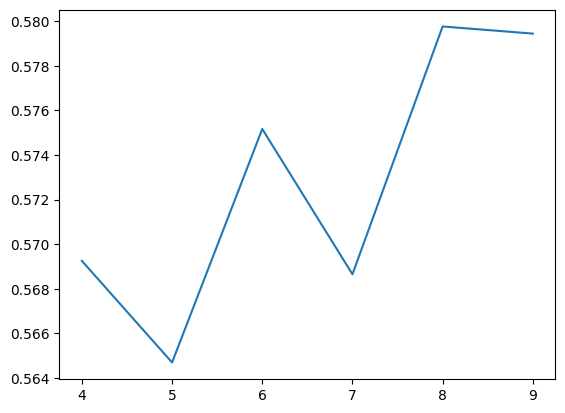

In [29]:
# cross validation to test different k values and pick the best one
k_values = range(4, 10)
cross_val_scores = []
training_data_x = training_data_preprocessed.drop('Class', axis=1)
for k in k_values:
    knn_hyperparameterization = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_hyperparameterization, training_data_x, training_data_preprocessed['Class'], cv=5, scoring='accuracy')
    cross_val_scores.append(scores.mean())

for i in range(len(k_values)):
    print(f'k={k_values[i]}: {cross_val_scores[i]}')

plt.plot(k_values, cross_val_scores)
print(f'Best k: {k_values[np.argmax(cross_val_scores)]}')